In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import IFrame
from plotly.offline import plot

# Data Collection

In [64]:
df = pd.read_csv("aqi_data.csv")
df.head(2)

,rank,city,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,1,"Begusarai, India",223,413,337,250,258,209,205,131,115,100,114,298,249
1,2,"Patna, India",212,354,297,225,230,169,183,82,100,84,136,402,277


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rank    5377 non-null   int64 
 1   city    5377 non-null   object
 2   avg     5377 non-null   int64 
 3   jan     5377 non-null   object
 4   feb     5377 non-null   object
 5   mar     5377 non-null   object
 6   apr     5377 non-null   object
 7   may     5377 non-null   object
 8   jun     5377 non-null   object
 9   jul     5377 non-null   object
 10  aug     5377 non-null   object
 11  sep     5377 non-null   object
 12  oct     5377 non-null   object
 13  nov     5377 non-null   object
 14  dec     5377 non-null   object
dtypes: int64(2), object(13)
memory usage: 630.2+ KB


# Data Processing and Cleaning

In [66]:
object_values = df.select_dtypes(include = 'object')
numerical_values = df.select_dtypes(include = 'number')
object_values

,city,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,"Begusarai, India",413,337,250,258,209,205,131,115,100,114,298,249
1,"Patna, India",354,297,225,230,169,183,82,100,84,136,402,277
2,"Saharsa, India",418,344,238,220,167,149,85,93,91,110,282,292
3,"New Delhi, India",325,244,167,181,175,124,70,110,91,210,405,352
4,"Noida, India",304,212,154,187,176,129,70,125,118,237,367,338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5372,"Hyvinkaa, Finland",-,-,-,-,-,-,-,-,-,-,7,10
5373,"Joensuu, Finland",4,7,1,4,0,0,0,0,0,-,0,0
5374,"Mikkeli, Finland",-,-,-,-,-,-,-,-,-,-,6,7
5375,"Tornio, Finland",-,-,-,-,-,-,-,-,-,-,6,6


In [67]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
for month in months:
    df[month] = pd.to_numeric(df[month], errors='coerce').astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5377 entries, 0 to 5376
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rank    5377 non-null   int64 
 1   city    5377 non-null   object
 2   avg     5377 non-null   int64 
 3   jan     4835 non-null   Int64 
 4   feb     4833 non-null   Int64 
 5   mar     4875 non-null   Int64 
 6   apr     4840 non-null   Int64 
 7   may     4825 non-null   Int64 
 8   jun     4784 non-null   Int64 
 9   jul     4754 non-null   Int64 
 10  aug     4739 non-null   Int64 
 11  sep     4637 non-null   Int64 
 12  oct     4699 non-null   Int64 
 13  nov     5364 non-null   Int64 
 14  dec     5373 non-null   Int64 
dtypes: Int64(12), int64(2), object(1)
memory usage: 693.3+ KB


# Normalizing the data for better comparison

In [68]:
df['city_name'] = df['city'].str.split(', ').str.get(-2)
df['country'] = df['city'].str.split(', ').str.get(-1)

In [69]:
df.head(7)

,rank,city,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,city_name,country
0,1,"Begusarai, India",223,413,337,250,258,209,205,131,115,100,114,298,249,Begusarai,India
1,2,"Patna, India",212,354,297,225,230,169,183,82,100,84,136,402,277,Patna,India
2,3,"Saharsa, India",207,418,344,238,220,167,149,85,93,91,110,282,292,Saharsa,India
3,4,"New Delhi, India",205,325,244,167,181,175,124,70,110,91,210,405,352,New Delhi,India
4,5,"Noida, India",201,304,212,154,187,176,129,70,125,118,237,367,338,Noida,India
5,6,"Kashgar, China",197,283,175,288,285,184,99,106,135,126,118,206,355,Kashgar,China
6,7,"Ghaziabad, India",190,302,216,155,175,164,124,68,101,98,185,360,332,Ghaziabad,India


In [70]:
# Check Null Values or Missing Values
df.isnull().sum()

rank           0
city           0
avg            0
jan          542
feb          544
mar          502
apr          537
may          552
jun          593
jul          623
aug          638
sep          740
oct          678
nov           13
dec            4
city_name      0
country        0
dtype: int64

In [71]:
df.sample(10)

,rank,city,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,city_name,country
620,621,"Niala Kondapalle, India",64,106,89,70,67,65,66,27,39,28,66,74,72,Niala Kondapalle,India
3146,3147,"Southampton, United Kingdom",23,27,29,23,26,26,31,20,17,22,16,18,20,Southampton,United Kingdom
5348,5349,"Summerlin South, United States",1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,8,Summerlin South,United States
4970,4971,"Hobart, Australia",5,4,4,4,7,6,7,5,6,5,5,5,4,Hobart,Australia
3985,3986,"Stavelot, Belgium",16,<NA>,20,18,25,28,35,22,18,14,6,5,6,Stavelot,Belgium
378,379,"Xinyang, China",82,195,130,130,111,55,46,34,42,40,62,70,72,Xinyang,China
4489,4490,"Masaka, Uganda",11,39,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,40,47,Masaka,Uganda
4032,4033,"Aspen, United States",16,5,8,14,25,14,15,29,25,<NA>,20,16,17,Aspen,United States
1977,1978,"Fukata, Japan",29,31,30,35,38,35,31,25,21,25,28,26,26,Fukata,Japan
4354,4355,"Lawrenceburg, United States",13,10,12,14,12,15,19,17,14,12,10,10,9,Lawrenceburg,United States


In [72]:
# Drop Null Values
new_df = df.dropna()

In [73]:
new_df.isnull().sum()

rank         0
city         0
avg          0
jan          0
feb          0
mar          0
apr          0
may          0
jun          0
jul          0
aug          0
sep          0
oct          0
nov          0
dec          0
city_name    0
country      0
dtype: int64

In [74]:
new_df

,rank,city,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,city_name,country
0,1,"Begusarai, India",223,413,337,250,258,209,205,131,115,100,114,298,249,Begusarai,India
1,2,"Patna, India",212,354,297,225,230,169,183,82,100,84,136,402,277,Patna,India
2,3,"Saharsa, India",207,418,344,238,220,167,149,85,93,91,110,282,292,Saharsa,India
3,4,"New Delhi, India",205,325,244,167,181,175,124,70,110,91,210,405,352,New Delhi,India
4,5,"Noida, India",201,304,212,154,187,176,129,70,125,118,237,367,338,Noida,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,5353,"Ballarat, Australia",1,1,1,1,1,1,1,1,1,1,1,1,1,Ballarat,Australia
5356,5357,"Bandar Seri Begawan, Brunei",1,0,0,0,0,0,0,0,0,0,0,0,15,Bandar Seri Begawan,Brunei
5357,5358,"Bangar, Brunei",1,0,0,0,0,0,0,0,0,0,0,0,8,Bangar,Brunei
5358,5359,"Kuala Belait, Brunei",1,0,0,0,0,0,0,0,0,0,0,0,16,Kuala Belait,Brunei


In [75]:
new_df.sample(10)

,rank,city,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,city_name,country
3096,3097,"Galloway, United States",24,16,20,23,27,22,48,28,25,23,18,20,17,Galloway,United States
2412,2413,"Suwa, Japan",27,23,26,33,37,35,31,30,20,22,24,24,22,Suwa,Japan
2027,2028,"Yokoshiba, Japan",29,26,30,32,37,34,32,25,20,24,27,27,28,Yokoshiba,Japan
322,323,"Changzhi, China",86,125,144,125,101,64,61,54,54,58,75,74,96,Changzhi,China
2800,2801,"Dax, France",25,34,41,31,27,28,26,21,23,24,18,10,14,Dax,France
3787,3788,"Wuppertal, Germany",18,17,19,16,18,18,22,17,16,18,17,16,17,Wuppertal,Germany
626,627,"Malayer, Iran",64,54,59,46,45,72,54,98,80,82,67,56,49,Malayer,Iran
975,976,"Irapuato, Mexico",48,63,60,60,53,53,55,38,33,41,32,43,44,Irapuato,Mexico
4023,4024,"Noya, Spain",16,14,21,18,15,18,17,12,13,13,17,15,16,Noya,Spain
1157,1158,"Yakeshi, China",42,42,45,48,61,54,38,42,34,33,34,29,40,Yakeshi,China


In [76]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4419 entries, 0 to 5359
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank       4419 non-null   int64 
 1   city       4419 non-null   object
 2   avg        4419 non-null   int64 
 3   jan        4419 non-null   Int64 
 4   feb        4419 non-null   Int64 
 5   mar        4419 non-null   Int64 
 6   apr        4419 non-null   Int64 
 7   may        4419 non-null   Int64 
 8   jun        4419 non-null   Int64 
 9   jul        4419 non-null   Int64 
 10  aug        4419 non-null   Int64 
 11  sep        4419 non-null   Int64 
 12  oct        4419 non-null   Int64 
 13  nov        4419 non-null   Int64 
 14  dec        4419 non-null   Int64 
 15  city_name  4419 non-null   object
 16  country    4419 non-null   object
dtypes: Int64(12), int64(2), object(3)
memory usage: 673.2+ KB


In [77]:
len(new_df['country'].unique()),len(new_df['city_name'].unique())

(122, 4419)

In [78]:
# Analysis of Country wise
country_avg = new_df.groupby('country')['avg'].mean().reset_index()
country_avg[country_avg['country'] == 'India']

,country,avg
45,India,83.283372


In [79]:
# Plotting with Plotly
fig = px.bar(country_avg, x='country', y='avg', title='Average Air Quality of 2023 by Country', labels={'avg': 'Average AQI', 'Country': 'Country'},color_discrete_sequence=['skyblue'])
fig.update_layout(xaxis={'categoryorder':'total ascending'}, xaxis_title='country', yaxis_title='Average AQI')
# Save the plot as an HTML file
plot(fig, filename="country_avg.html", auto_open=False)
IFrame("aqi_plot1.html", width=800, height=600)

In [80]:
country_avg['Country_Rank'] = new_df.groupby('country')['avg'].rank(method='dense', ascending=False).astype('Int64')
country_avg.sample(10)

,country,avg,Country_Rank
35,Gabon,37.000000,21
0,Albania,14.000000,1
20,Chile,39.083333,14
21,China,73.969780,15
38,Ghana,22.000000,22
92,Russia,15.277778,34
106,Taiwan,37.413793,36
6,Austria,14.885246,6
14,Brunei,1.000000,<NA>
81,North Korea,52.750000,32


In [81]:
# Plot using Plotly
fig = px.scatter(country_avg, x='Country_Rank', y='avg', color='country', 
                 hover_name='country', 
                 title="Pollution Level by City Rank within Each Country",
                 labels={'avg': 'Average Pollution', 'Country_Rank': 'Rank within Country'},
                 size_max=10)
plot(fig, filename="aqi_plot2.html", auto_open=False)
IFrame("aqi_plot2.html", width=800, height=600)

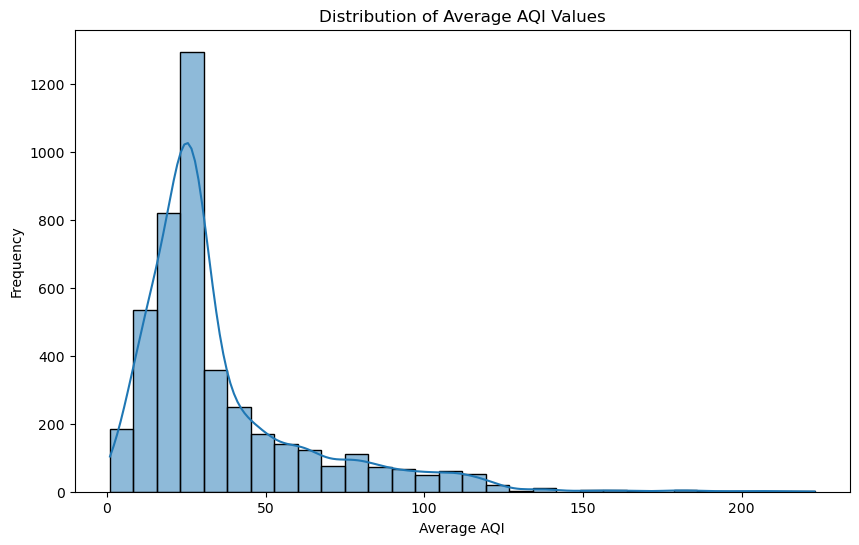

In [82]:
# Distribution of average AQI values
plt.figure(figsize=(10, 6))
sns.histplot(new_df['avg'], bins=30, kde=True)
plt.title('Distribution of Average AQI Values')
plt.xlabel('Average AQI')
plt.ylabel('Frequency')
plt.show()

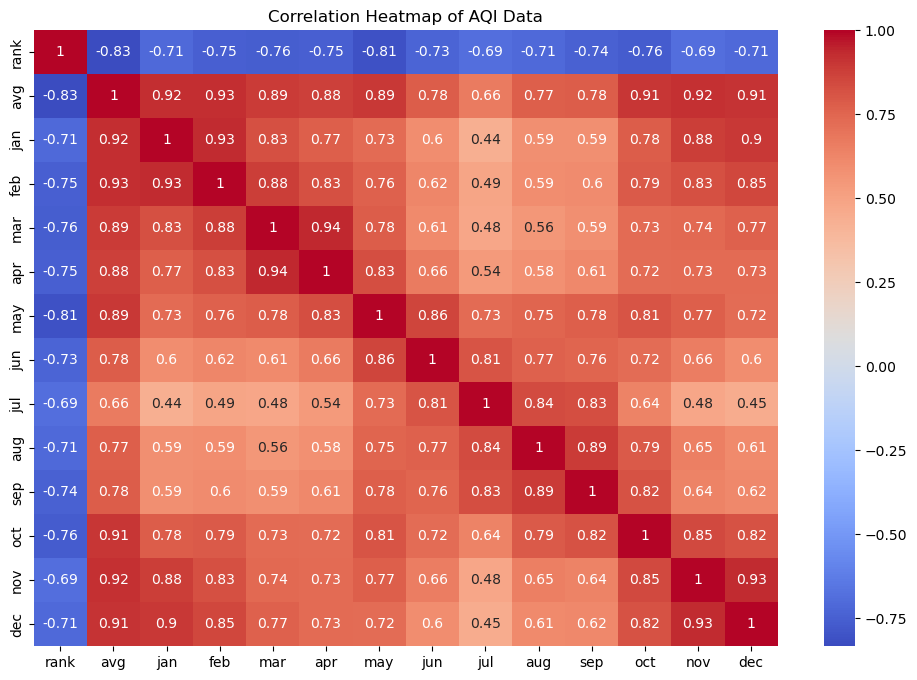

In [83]:
# Correlation heatmap for numeric columns
numeric_df = new_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of AQI Data')
plt.show()

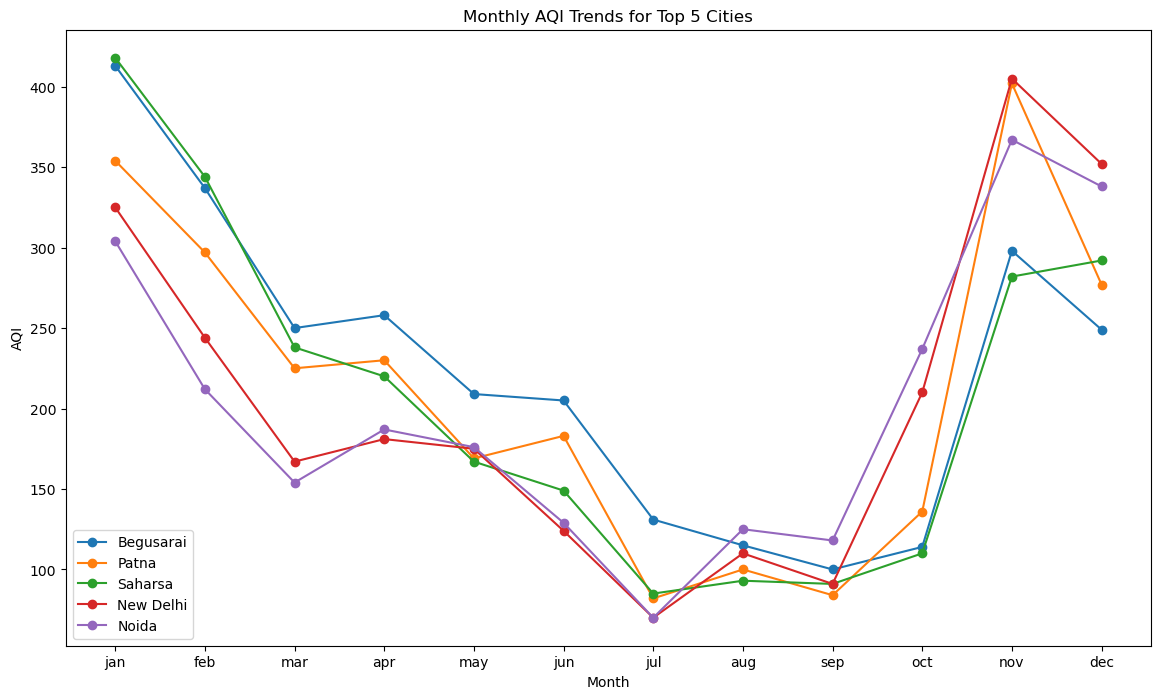

In [84]:
# Top 5 cities with highest average AQI
top_cities = new_df.nlargest(5, 'avg')

# Plot monthly AQI trends
plt.figure(figsize=(14, 8))
for index, row in top_cities.iterrows():
    plt.plot(months, row[months], marker='o', label=row['city_name'])
plt.title('Monthly AQI Trends for Top 5 Cities')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.legend()
plt.show()

# Models

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [86]:
# Encode country names to numeric values
new_df['Country_Code'] = LabelEncoder().fit_transform(new_df['country'])

In [87]:
new_df.sample(10)

,rank,city,avg,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,city_name,country,Country_Code
3509,3510,"Redondo, Portugal",20,15,23,20,23,27,24,24,25,18,20,9,8,Redondo,Portugal,87
2109,2110,"Sakado, Japan",28,24,28,31,34,33,34,34,20,24,25,25,22,Sakado,Japan,52
475,476,"Ahram, Iran",75,55,64,46,50,97,90,86,107,93,94,71,51,Ahram,Iran,47
3584,3585,"Lyon, France",20,17,32,25,16,19,22,17,19,20,15,14,21,Lyon,France,33
2025,2026,"Umi, Japan",29,29,28,33,36,35,32,24,21,25,29,27,24,Umi,Japan,52
596,597,"Addanki, India",65,116,92,77,68,64,66,27,34,28,55,74,77,Addanki,India,45
3103,3104,"Chitila, Romania",23,38,45,30,22,12,11,14,14,11,15,20,40,Chitila,Romania,91
3541,3542,"Ecorse, United States",20,17,18,20,21,16,58,20,17,12,9,12,15,Ecorse,United States,117
1545,1546,"Mulvane, United States",34,26,29,30,39,37,40,31,43,46,35,28,21,Mulvane,United States,117
1429,1430,"Santa Cruz, Spain",36,33,62,29,38,29,27,25,36,23,47,30,51,Santa Cruz,Spain,102


# Multi-level Clustering

In [88]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [89]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_df.iloc[:, 4:-3])
X_scaled

array([[ 7.19073456,  5.8262181 ,  6.59165251, ...,  3.00077122,
         6.31026863,  4.56815105],
       [ 6.2138748 ,  5.13244801,  5.7498297 , ...,  3.80521904,
         8.82799051,  5.18432526],
       [ 7.36168502,  5.49320845,  5.44917869, ...,  2.85450798,
         5.9229268 ,  5.51441859],
       ...,
       [-1.03930893, -1.1114828 , -1.16514341, ..., -1.16773108,
        -0.9039729 , -0.73534844],
       [-1.03930893, -1.1114828 , -1.16514341, ..., -1.16773108,
        -0.9039729 , -0.55929866],
       [-1.03930893, -1.1114828 , -1.16514341, ..., -1.16773108,
        -0.9039729 , -0.55929866]])